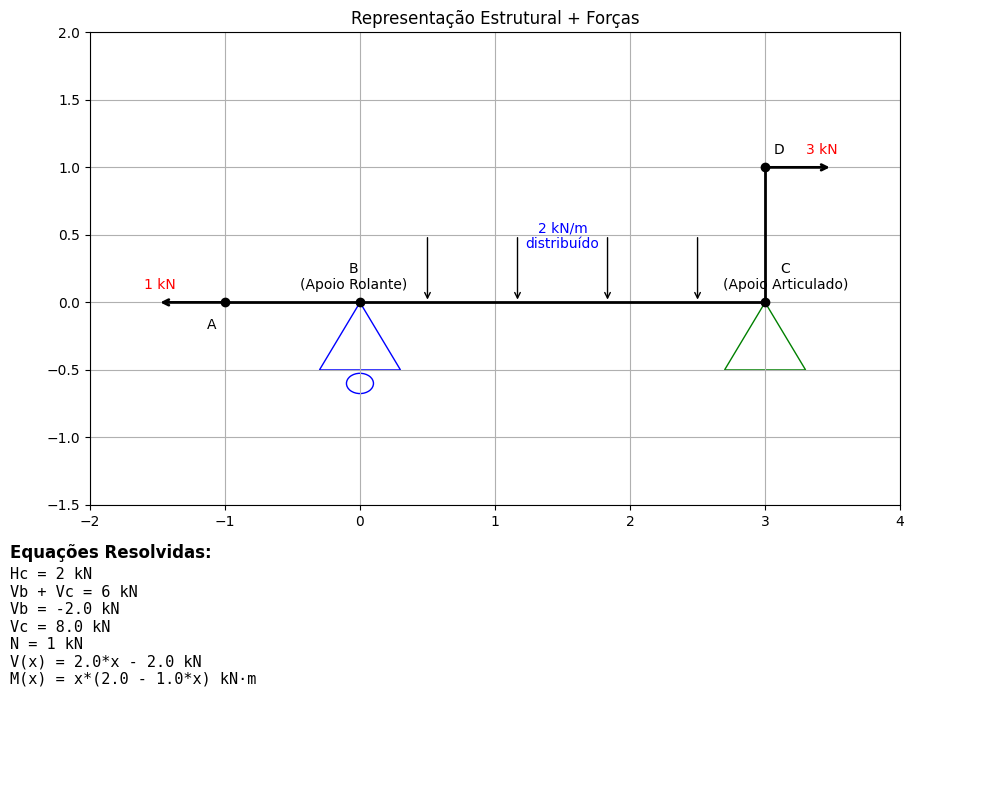

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import sympy as sp


def resolver_estrutura(Ha=1, Hd=-3, Pbc=-2):
    # === CÁLCULOS SIMBÓLICOS E NUMÉRICOS ===
    Fh = 0
    Hc = Fh - Ha - Hd

    Fv = 0
    Abc = 3
    Vbc = Pbc * Abc
    Vb_Vc = Fv - Vbc

    Mc = 0
    Vb = (Vbc * 3 / 2 - Hd * 1 - Mc) / 3
    Vc = Vb_Vc - Vb

    Fh_barra = 0
    N = Fh_barra + Ha

    Fv_barra = 0
    x = sp.Symbol("x")
    V = Fv_barra + Vb * (1 - x)
    M = -sp.integrate(V, x)

    equacoes = [
        f"Hc = {Hc} kN",
        f"Vb + Vc = {Vb_Vc} kN",
        f"Vb = {Vb} kN",
        f"Vc = {Vc} kN",
        f"N = {N} kN",
        f"V(x) = {sp.simplify(V)} kN",
        f"M(x) = {sp.simplify(M)} kN·m",
    ]

    return Hc, Vb, Vc, N, V, M, equacoes


def plot_estrutura_e_equacoes(Ha=1, Hd=-3, Pbc=-2):
    Hc, Vb, Vc, N, V, M, eqs = resolver_estrutura(Ha, Hd, Pbc)

    A = (-1, 0)
    B = (0, 0)
    C = (3, 0)
    D = (3, 1)

    fig, (ax1, ax2) = plt.subplots(
        2, 1, figsize=(10, 8), gridspec_kw={"height_ratios": [2, 1]}
    )

    # === PLOT DA ESTRUTURA ===
    ax1.plot([A[0], B[0]], [A[1], B[1]], "k-", linewidth=2)  # A-B
    ax1.plot([B[0], C[0]], [B[1], C[1]], "k-", linewidth=2)  # B-C
    ax1.plot([C[0], D[0]], [C[1], D[1]], "k-", linewidth=2)  # C-D

    for point, label, dx, dy in zip(
        [A, B, C, D],
        ["A", "B\n(Apoio Rolante)", "C\n(Apoio Articulado)", "D"],
        [-0.1, -0.05, 0.15, 0.1],
        [-0.2, 0.1, 0.1, 0.1],
    ):
        ax1.plot(point[0], point[1], "ko")
        ax1.text(point[0] + dx, point[1] + dy, label, fontsize=10, ha="center")

    # Apoio articulado em C
    ax1.add_patch(
        patches.Polygon(
            [[C[0] - 0.3, C[1] - 0.5], [C[0] + 0.3, C[1] - 0.5], [C[0], C[1]]],
            closed=True,
            fill=None,
            edgecolor="green",
        )
    )

    # Apoio rolante em B
    ax1.add_patch(
        patches.Polygon(
            [[B[0] - 0.3, B[1] - 0.5], [B[0] + 0.3, B[1] - 0.5], [B[0], B[1]]],
            closed=True,
            fill=None,
            edgecolor="blue",
        )
    )
    ax1.add_patch(
        patches.Ellipse((B[0], B[1] - 0.6), 0.2, 0.15, fill=None, edgecolor="blue")
    )

    # Força de Ha em A (horizontal)
    ax1.annotate(
        "",
        xy=(A[0] - 0.5, A[1]),
        xytext=(A[0], A[1]),
        arrowprops=dict(facecolor="red", arrowstyle="->", lw=2),
    )
    ax1.text(A[0] - 0.6, A[1] + 0.1, f"{Ha} kN", color="red")

    # Força horizontal Hd em D
    ax1.annotate(
        "",
        xy=(D[0] + 0.5, D[1]),
        xytext=(D[0], D[1]),
        arrowprops=dict(facecolor="red", arrowstyle="->", lw=2),
    )
    ax1.text(D[0] + 0.3, D[1] + 0.1, f"{-Hd} kN", color="red")

    # Carregamento distribuído entre B e C
    for i in range(4):
        x = 0.5 + i * (2.0 / 3)
        ax1.annotate(
            "",
            xy=(x, 0),  # Changed end point to y=0
            xytext=(x, 0.5),  # Start point remains at y=0.5
            arrowprops=dict(facecolor="blue", arrowstyle="->", lw=1),
        )
    ax1.text(1.5, 0.4, f"{-Pbc} kN/m\ndistribuído", ha="center", color="blue")

    ax1.set_xlim(-2, 4)
    ax1.set_ylim(-1.5, 2)
    ax1.set_aspect("equal")
    ax1.set_title("Representação Estrutural + Forças")
    ax1.grid(True)

    # === PLOT DAS EQUAÇÕES RESOLVIDAS ===
    ax2.axis("off")
    text = "\n".join(eqs)
    ax2.text(0, 1, "Equações Resolvidas:", fontsize=12, weight="bold", va="top")
    ax2.text(0, 0.9, text, fontsize=11, family="monospace", va="top")

    plt.tight_layout()
    plt.show()


# === EXEMPLO DE USO ===
if __name__ == "__main__":
    plot_estrutura_e_equacoes(Ha=1, Hd=-3, Pbc=-2)